In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# --- Configuration --- #
IMG_SIZE = 224
#DATA_DIR = '/content/drive/MyDrive/ASL Project/Data'
DATA_DIR = '/Sign Language Detection/Data'

In [ ]:
# --- Data Loading and Preprocessing --- #
print("\n--- Starting Data Loading and Preprocessing ---")

# Get the list of gesture categories from the 'Data' directory
categories = [folder_name for folder_name in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, folder_name))]

# Filter out any hidden files or system directories that might be in 'Data'
categories = sorted([c for c in categories if not c.startswith('.')])

if not categories:
    print(f"Warning: No valid gesture categories found in '{DATA_DIR}'. Please ensure your 'Data' folder contains subfolders with image files.")
else:
    print(f"Detected gesture categories: {categories}")

# Initialize lists to store images and labels
images = []
labels = []

# Iterate through each gesture category and load images
for category in categories:
    path = os.path.join(DATA_DIR, category)
    if not os.path.exists(path):
        print(f"Warning: Directory '{path}' not found. Skipping category '{category}'.")
        continue

    print(f"Loading images for category: {category}")
    for img_name in os.listdir(path):
        try:
            img_path = os.path.join(path, img_name)

            # Skip non-image files and hidden files
            if not (img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')) and not img_name.startswith('.')):
                continue

            img = cv2.imread(img_path)

            # Check if image was loaded successfully
            if img is None:
                print(f"Warning: Could not load image {img_name} from {path}. Skipping.")
                continue

            # Resize the image to IMG_SIZE x IMG_SIZE
            img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            images.append(img_resized)
            labels.append(category)
        except Exception as e:
            print(f"Error processing image {img_name} in {path}: {e}")

print(f"Loaded {len(images)} images from {len(categories)} categories.")

# Add a check for empty dataset before proceeding with normalization, encoding, and splitting
if len(images) == 0:
    print("No images were loaded. Cannot proceed with data normalization, encoding, and splitting. Please ensure 'Data' folder is correctly uploaded and contains images.")

    X_train, X_val, y_train, y_val = None, None, None, None # Set to None if no data
    label_binarizer = None
else:
    # Convert lists to NumPy arrays
    X = np.array(images)
    y = np.array(labels)

    # Normalize image pixel values to [0, 1]
    X = X / 255.0

    # Encode categorical string labels into numerical format
    label_binarizer = LabelBinarizer()
    y_encoded = label_binarizer.fit_transform(y)

    # Split the data into training and validation sets
    # Using stratify=y_encoded ensures that the proportion of classes is the same in both train and test sets.
    X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

    print(f"Dataset prepared:\n  Training images: {X_train.shape}\n  Training labels: {y_train.shape}\n  Validation images: {X_val.shape}\n  Validation labels: {y_val.shape}")
    print(f"Classes: {label_binarizer.classes_}")

print("--- Data Loading and Preprocessing Complete ---")


--- Starting Data Loading and Preprocessing ---
Detected gesture categories: ['1', '10', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'Hello', 'Help', 'I', 'J', 'K', 'L', 'M', 'N', 'No', 'O', 'P', 'Q', 'R', 'S', 'Sorry', 'Stop', 'T', 'U', 'V', 'W', 'X', 'Y']
Loading images for category: 1
Loading images for category: 10
Loading images for category: 2
Loading images for category: 3
Loading images for category: 4
Loading images for category: 5
Loading images for category: 6
Loading images for category: 7
Loading images for category: 8
Loading images for category: 9
Loading images for category: A
Loading images for category: B
Loading images for category: C
Loading images for category: D
Loading images for category: E
Loading images for category: F
Loading images for category: G
Loading images for category: H
Loading images for category: Hello
Loading images for category: Help
Loading images for category: I
Loading images for category: J
Loading images 

# Training

CNN

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Get the number of classes from the encoded labels
num_classes = y_encoded.shape[1]

print(f"Number of classes: {num_classes}")

# --- Model Definition --- #
print("\n--- Defining the CNN Model ---")
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax') # Output layer with num_classes and softmax for multi-class classification
])

# --- Model Compilation --- #
print("--- Compiling the Model ---")
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # Appropriate loss for multi-class classification
              metrics=['accuracy'])

model.summary()

# --- Model Training --- #
print("\n--- Training the Model ---")
# Define batch size and number of epochs
batch_size = 32
epochs = 10

# Train the model
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val, y_val))

print("--- Model Training Complete ---")

Number of classes: 40

--- Defining the CNN Model ---
--- Compiling the Model ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 40)             │         5,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,174,120 (42.63 MB)

 Trainable params: 11,174,120 (42.63 MB)

 Non-trainable params: 0 (0.00 B)


--- Training the Model ---
Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.0313 - loss: 4.3712 - val_accuracy: 0.0260 - val_loss: 3.5842
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.1135 - loss: 3.4517 - val_accuracy: 0.4545 - val_loss: 2.4426
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.3687 - loss: 2.3779 - val_accuracy: 0.8182 - val_loss: 1.1530
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.6067 - loss: 1.3935 - val_accuracy: 0.8896 - val_loss: 0.5762
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.7465 - loss: 0.8500 - val_accuracy: 0.9351 - val_loss: 0.3843
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7858 - loss: 0.6748 - val_accuracy: 0.9286 - val_loss: 0.3425
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.8233 - loss: 0.4832 - val_accuracy: 0.9481 - val_loss: 0.2916
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.8355 - loss: 0.5225 - val_

Model 2 - MobileNetV2 Transfer Learning

In [33]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Define model architecture
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base layers

model2 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Train the model
history2 = model2.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val)
)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.0854 - loss: 3.7023 - val_accuracy: 0.4481 - val_loss: 2.4723
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.3703 - loss: 2.3997 - val_accuracy: 0.8117 - val_loss: 1.3872
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5950 - loss: 1.6239 - val_accuracy: 0.8766 - val_loss: 0.8746
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6834 - loss: 1.1716 - val_accuracy: 0.9481 - val_loss: 0.5650
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.7918 - loss: 0.8387 - val_accuracy: 0.9610 - val_loss: 0.3882
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8701 - loss: 0.5968 - val_accuracy: 0.9740 - val_loss: 0.2926
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8819 - loss: 0.5206 - val_accuracy: 0.9740 - val_loss: 0.2274
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 965ms/step - accuracy: 0.9254 - loss: 0.3771 - val_accuracy: 0.9870 - val_lo

MobileNetV2 Training Complete!
Final Training Accuracy: 0.9445350766181946
Final Validation Accuracy: 0.9870129823684692


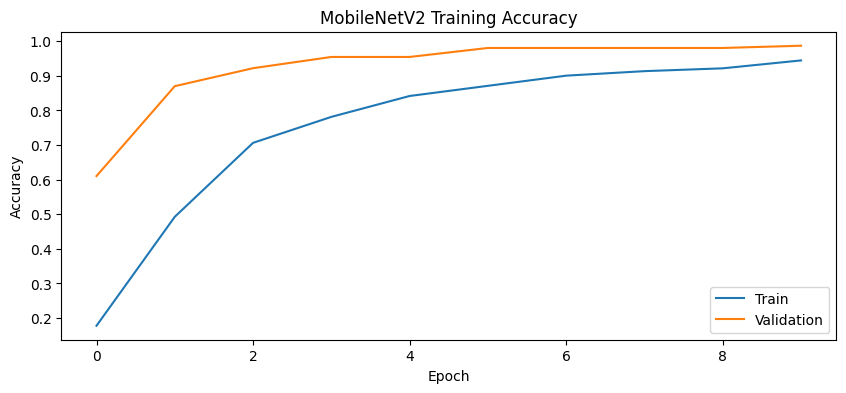

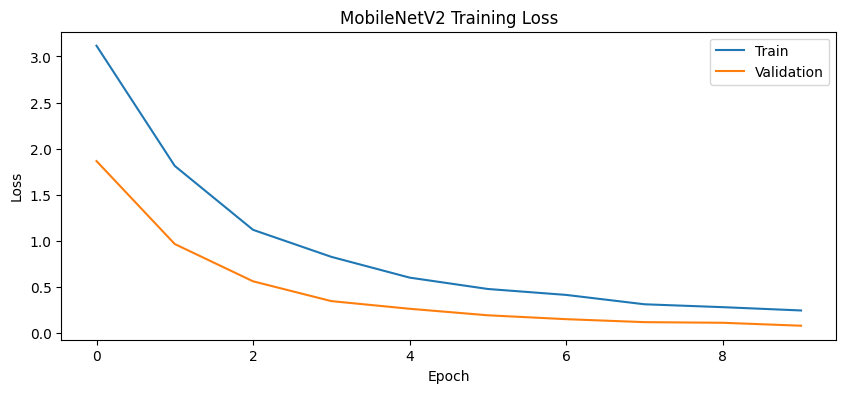

In [27]:
# Print training and validation accuracy/loss after training
print("MobileNetV2 Training Complete!")
print("Final Training Accuracy:", history2.history['accuracy'][-1])
print("Final Validation Accuracy:", history2.history['val_accuracy'][-1])

# Plot training history
plt.figure(figsize=(10, 4))
plt.plot(history2.history['accuracy'], label='Train')
plt.plot(history2.history['val_accuracy'], label='Validation')
plt.title("MobileNetV2 Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(history2.history['loss'], label='Train')
plt.plot(history2.history['val_loss'], label='Validation')
plt.title("MobileNetV2 Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Visulization


--- Evaluating Model Performance ---
Validation Loss: 0.3087
Validation Accuracy: 0.9481

--- Plotting Training History ---


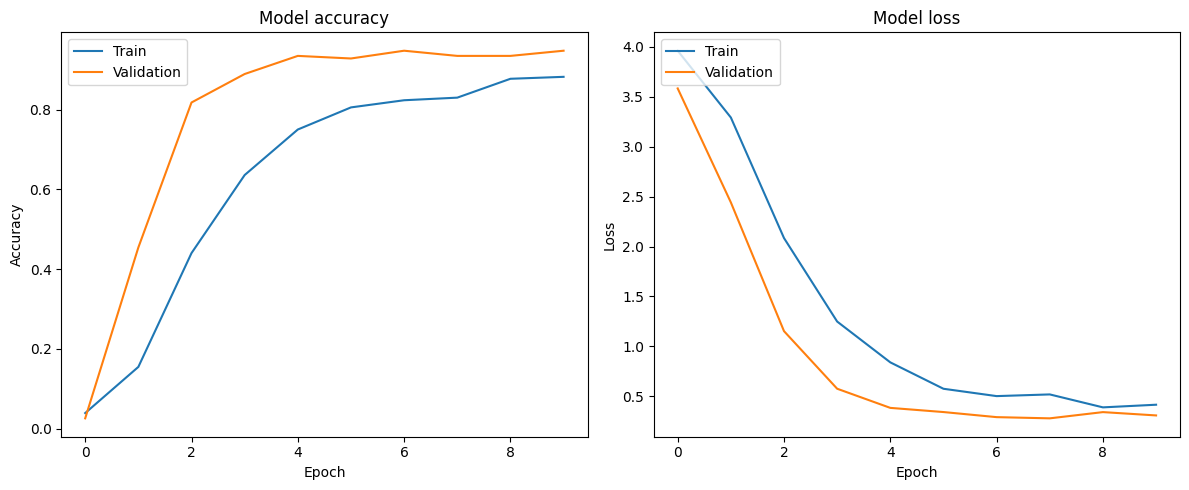

In [15]:
import matplotlib.pyplot as plt

# --- Model Evaluation --- #
print("\n--- Evaluating Model Performance ---")
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

# --- Visualize Training History --- #
print("\n--- Plotting Training History ---")
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 733ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         4
           2       1.00      0.88      0.93         8
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4
           A       0.80      1.00      0.89         4
           B       1.00      1.00      1.00         4
           C       1.00      1.00      1.00         4
           D       1.00      1.00      1.00         6
           E       1.00      1.00      1.00         4
           F       1.00      0.75      0.86         4
           G       0.60      0.75      0.67         4
           H       1.00    

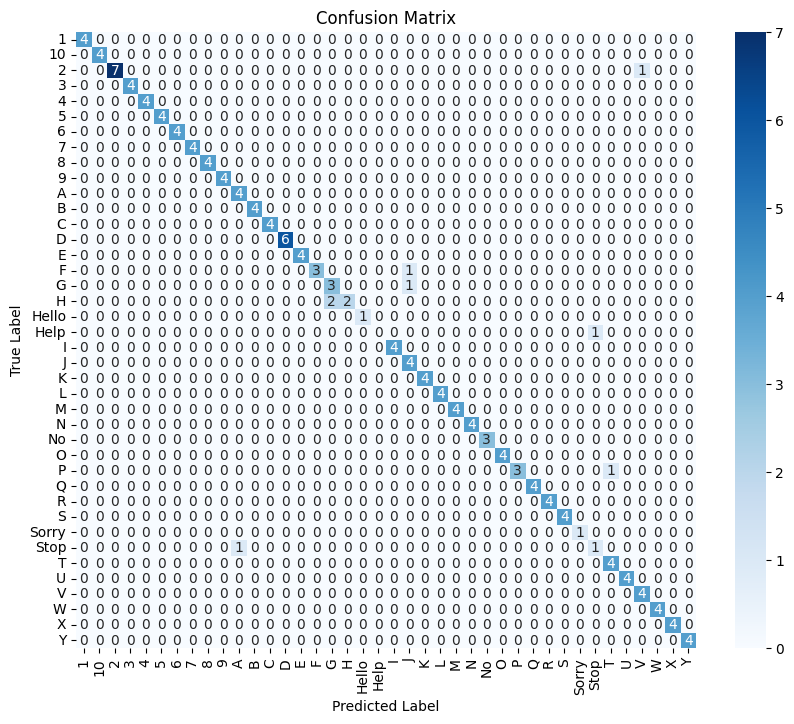

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# After model.evaluate()
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Classification Report
print(classification_report(y_true_classes, y_pred_classes,
                           target_names=categories))

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# Testing


--- Displaying Single Image Prediction ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


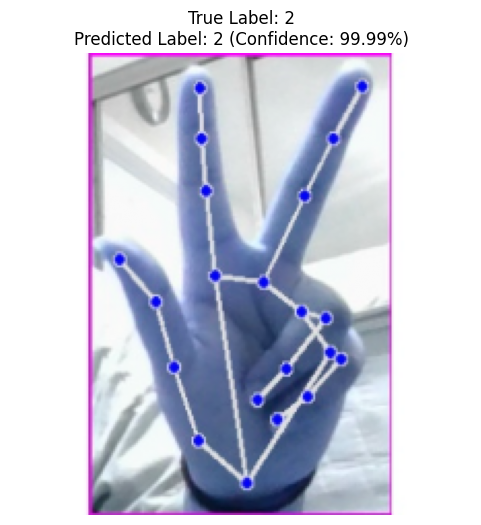

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# --- Display Single Image Prediction --- #
print("\n--- Displaying Single Image Prediction ---")

# Select a random image from the validation set
random_index = np.random.randint(0, len(X_val))
sample_image = X_val[random_index]
sample_label_encoded = y_val[random_index]

# Get the true label
true_label = label_binarizer.inverse_transform(sample_label_encoded.reshape(1, -1))[0]

# Reshape the image for prediction
image_for_prediction = np.expand_dims(sample_image, axis=0)

# Make a prediction
predictions = model.predict(image_for_prediction)
predicted_class_index = np.argmax(predictions)
predicted_label = label_binarizer.classes_[predicted_class_index]
confidence = predictions[0][predicted_class_index] * 100

# Display the image and prediction results
plt.figure(figsize=(6, 6))
plt.imshow(sample_image)
plt.title(f"True Label: {true_label}\nPredicted Label: {predicted_label} (Confidence: {confidence:.2f}%)")
plt.axis('off')
plt.show()